# Imports

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
# from sklearn.mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# First Dataset DDL

In [3]:

df = pd.read_csv('DLLs_Imported.csv')
df.head(100)

SHA256  Type  advapi32.dll  \
0   002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...     0             1   
1   2a053f32b1d48539e3e2807f86754be87ce95b08378467...     0             1   
2   2f031a1752f7067fb9f483ae0ac5f3036c9b66cc4af40e...     0             1   
3   308e8bb2e8a3b67607d2454370e0b50147b42049bda813...     0             1   
4   31aaba443b9869e6e68c17125f8d7989cbd762fb38ae3a...     0             1   
..                                                ...   ...           ...   
95  df3be72be588f2b532738f0e78ea853f79facfb8bb26d4...     0             1   
96  e1913ca829634bac9b78031eb20c79fb7b1d5c9ebacd27...     0             1   
97  e47adb18253dbdf07276faef715d56fc3840b20ea2c2e6...     0             1   
98  e5c6eb60211ec6b21425f7cd63d597109dfd4c867b5645...     0             1   
99  e65843dd08f0044bfebc429e3ced7e936dc83c2d304fe7...     0             1   

    kernel32.dll  vspmsg.dll  ole32.dll  oleaut32.dll  psapi.dll  \
0              1           1          1             1          1   
1              1           0          0             0          0   
2              1           0          1             0          0   
3              1           0          1             1          1   
4              1           0          0             0          0   
..           ...         ...        ...           ...        ...   
95             1           0          1             1          0   
96             1           0          0             0          0   
97             1           0          1             0          0   
98             1           0          1             1          0   
99             1           0          1             0          0   

    setupapi.dll  shlwapi.dll  ...  odbccp32.dll  \
0              1            1  ...             0   
1              0            0  ...             0   
2              0            0  ...             0   
3              0            1  ...             0   
4              0            0  ...             0   
..           ...          ...  ...           ...   
95             0            0  ...             0   
96             0            0  ...             0   
97             0            0  ...             0   
98             0            0  ...             0   
99             0            1  ...             0   

    api-ms-win-crt-environment-l1-1-0.dll  api-ms-win-core-memory-l1-1-3.dll  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   
..                                    ...                                ...   
95                                      0                                  0   
96                                      0                                  0   
97                                      0                                  0   
98                                      0                                  0   
99                                      0                                  0   

    api-ms-win-core-datetime-l1-1-0.dll  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
..                                  ...   
95                                    0   
96                                    0   
97                                    0   
98                                    0   
99                                    0   

    api-ms-win-core-psapi-ansi-l1-1-0.dll  api-ms-win-core-fibers-l1-1-0.dll  \
0                                       0                                  0   
1                                       0 

In [4]:
df.shape


(29498, 631)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29498 entries, 0 to 29497
Columns: 631 entries, SHA256 to d3d11.dll
dtypes: int64(630), object(1)
memory usage: 142.0+ MB


In [6]:
null_counts = df.isnull().sum()
print(null_counts)

SHA256                                0
Type                                  0
advapi32.dll                          0
kernel32.dll                          0
vspmsg.dll                            0
                                     ..
api-ms-win-core-fibers-l1-1-0.dll     0
api-ms-win-core-file-l2-1-0.dll       0
api-ms-win-core-sysinfo-l1-2-0.dll    0
dbgeng.dll                            0
d3d11.dll                             0
Length: 631, dtype: int64


In [7]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
29493    False
29494    False
29495    False
29496    False
29497    False
Length: 29498, dtype: bool


In [8]:
df.dtypes

SHA256                                object
Type                                   int64
advapi32.dll                           int64
kernel32.dll                           int64
vspmsg.dll                             int64
                                       ...  
api-ms-win-core-fibers-l1-1-0.dll      int64
api-ms-win-core-file-l2-1-0.dll        int64
api-ms-win-core-sysinfo-l1-2-0.dll     int64
dbgeng.dll                             int64
d3d11.dll                              int64
Length: 631, dtype: object

In [9]:
df.head()

SHA256  Type  advapi32.dll  \
0  002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...     0             1   
1  2a053f32b1d48539e3e2807f86754be87ce95b08378467...     0             1   
2  2f031a1752f7067fb9f483ae0ac5f3036c9b66cc4af40e...     0             1   
3  308e8bb2e8a3b67607d2454370e0b50147b42049bda813...     0             1   
4  31aaba443b9869e6e68c17125f8d7989cbd762fb38ae3a...     0             1   

   kernel32.dll  vspmsg.dll  ole32.dll  oleaut32.dll  psapi.dll  setupapi.dll  \
0             1           1          1             1          1             1   
1             1           0          0             0          0             0   
2             1           0          1             0          0             0   
3             1           0          1             1          1             0   
4             1           0          0             0          0             0   

   shlwapi.dll  ...  odbccp32.dll  api-ms-win-crt-environment-l1-1-0.dll  \
0            1  ...             0                                      0   
1            0  ...             0                                      0   
2            0  ...             0                                      0   
3            1  ...             0                                      0   
4            0  ...             0                                      0   

   api-ms-win-core-memory-l1-1-3.dll  api-ms-win-core-datetime-l1-1-0.dll  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   

   api-ms-win-core-psapi-ansi-l1-1-0.dll  api-ms-win-core-fibers-l1-1-0.dll  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   api-ms-win-core-file-l2-1-0.dll  api-ms-win-core-sysinfo-l1-2-0.dll  \
0                                0                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   dbgeng.dll  d3d11.dll  
0           0          0  
1           0          0  
2           0          0  
3           0          0  
4           0          0  

[5 rows x 631 columns]

In [10]:
df.columns

Index(['SHA256', 'Type', 'advapi32.dll', 'kernel32.dll', 'vspmsg.dll',
       'ole32.dll', 'oleaut32.dll', 'psapi.dll', 'setupapi.dll', 'shlwapi.dll',
       ...
       'odbccp32.dll', 'api-ms-win-crt-environment-l1-1-0.dll',
       'api-ms-win-core-memory-l1-1-3.dll',
       'api-ms-win-core-datetime-l1-1-0.dll',
       'api-ms-win-core-psapi-ansi-l1-1-0.dll',
       'api-ms-win-core-fibers-l1-1-0.dll', 'api-ms-win-core-file-l2-1-0.dll',
       'api-ms-win-core-sysinfo-l1-2-0.dll', 'dbgeng.dll', 'd3d11.dll'],
      dtype='object', length=631)

In [11]:
encoder = LabelEncoder()
df['SHA256'] = encoder.fit_transform(df['SHA256'])
df.head(5)

SHA256  Type  advapi32.dll  kernel32.dll  vspmsg.dll  ole32.dll  \
0      23     0             1             1           1          1   
1    5411     0             1             1           0          0   
2    6038     0             1             1           0          1   
3    6253     0             1             1           0          1   
4    6406     0             1             1           0          0   

   oleaut32.dll  psapi.dll  setupapi.dll  shlwapi.dll  ...  odbccp32.dll  \
0             1          1             1            1  ...             0   
1             0          0             0            0  ...             0   
2             0          0             0            0  ...             0   
3             1          1             0            1  ...             0   
4             0          0             0            0  ...             0   

   api-ms-win-crt-environment-l1-1-0.dll  api-ms-win-core-memory-l1-1-3.dll  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   api-ms-win-core-datetime-l1-1-0.dll  api-ms-win-core-psapi-ansi-l1-1-0.dll  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   

   api-ms-win-core-fibers-l1-1-0.dll  api-ms-win-core-file-l2-1-0.dll  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   

   api-ms-win-core-sysinfo-l1-2-0.dll  dbgeng.dll  d3d11.dll  
0                                   0           0          0  
1                                   0           0          0  
2                                   0           0          0  
3                                   0           0          0  
4                                   0           0          0  

[5 rows x 631 columns]

In [12]:

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
df['SHA256'] = scaler.fit_transform(df[['SHA256']])

df.head()

SHA256  Type  advapi32.dll  kernel32.dll  vspmsg.dll  ole32.dll  \
0  0.000780     0             1             1           1          1   
1  0.183461     0             1             1           0          0   
2  0.204720     0             1             1           0          1   
3  0.212009     0             1             1           0          1   
4  0.217197     0             1             1           0          0   

   oleaut32.dll  psapi.dll  setupapi.dll  shlwapi.dll  ...  odbccp32.dll  \
0             1          1             1            1  ...             0   
1             0          0             0            0  ...             0   
2             0          0             0            0  ...             0   
3             1          1             0            1  ...             0   
4             0          0             0            0  ...             0   

   api-ms-win-crt-environment-l1-1-0.dll  api-ms-win-core-memory-l1-1-3.dll  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   api-ms-win-core-datetime-l1-1-0.dll  api-ms-win-core-psapi-ansi-l1-1-0.dll  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   

   api-ms-win-core-fibers-l1-1-0.dll  api-ms-win-core-file-l2-1-0.dll  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   

   api-ms-win-core-sysinfo-l1-2-0.dll  dbgeng.dll  d3d11.dll  
0                                   0           0          0  
1                                   0           0          0  
2                                   0           0          0  
3                                   0           0          0  
4                                   0           0          0  

[5 rows x 631 columns]

In [13]:
df.shape

(29498, 631)

## DLL Feature selection

In [14]:
from sklearn.model_selection import train_test_split

X_DLL = df.drop(['Type'], axis=1)
y_DLL = df['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X_DLL, y_DLL,test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model_DLL = RandomForestClassifier(n_estimators=100, random_state=42)
model_DLL.fit(X_DLL, y_DLL)

# Get feature importances
feature_importances_DLL = pd.DataFrame(model_DLL.feature_importances_,
                                   index=X_DLL.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances_DLL)


                                       importance
SHA256                                   0.510073
mscoree.dll                              0.062861
msvbvm60.dll                             0.059459
kernel32.dll                             0.039349
gdi32.dll                                0.037554
...                                           ...
unattend.dll                             0.000000
wsmsvc.dll                               0.000000
api-ms-win-core-file-l2-1-2.dll          0.000000
api-ms-win-eventing-legacy-l1-1-0.dll    0.000000
librsvg-2-2.dll                          0.000000

[630 rows x 1 columns]


In [16]:
median_importance_DLL = feature_importances_DLL['importance'].median()
print(f"Median of feature importance scores: {median_importance_DLL}")

Median of feature importance scores: 9.958699274881081e-06


In [17]:
# Option 1: By a fixed threshold
median_threshold_DLL = 9.958699274881081e-06
# Example threshold
median_selected_features_DLL= feature_importances_DLL[feature_importances_DLL['importance'] > median_threshold_DLL].index.tolist()



In [18]:
# Assuming 'X' is your original dataset and 'selected_features' contains the list of feature names to keep

# Create a new DataFrame with only the selected features
finalDLL_df = df[median_selected_features_DLL]

# Now 'new_dataframe' contains only the columns for 'selected_features' with the same number of rows as 'X'
finalDLL_df.head()


SHA256  mscoree.dll  msvbvm60.dll  kernel32.dll  gdi32.dll  user32.dll  \
0  0.000780            0             0             1          0           0   
1  0.183461            0             0             1          0           0   
2  0.204720            0             0             1          0           1   
3  0.212009            0             0             1          0           1   
4  0.217197            0             0             1          0           0   

   msvcrt.dll  oleaut32.dll  winmm.dll  mfc42.dll  ...  \
0           0             1          0          0  ...   
1           0             0          0          0  ...   
2           1             0          0          0  ...   
3           0             1          0          0  ...   
4           0             0          0          0  ...   

   api-ms-win-core-winrt-error-l1-1-1.dll  dwmapi.dll  avcodec-56.dll  \
0                                       0           0               0   
1                                       0           0               0   
2                                       0           0               0   
3                                       0           0               0   
4                                       0           0               0   

   msvcdis110.dll  query.dll  commonlib.dll  \
0               0          0              0   
1               0          0              0   
2               0          0              0   
3               0          0              0   
4               0          0              0   

   api-ms-win-ntuser-sysparams-l1-1-0.dll  api-ms-win-core-io-l1-1-1.dll  \
0                                       0                              0   
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   

   browseui.dll  avformat-56.dll  
0             0                0  
1             0                0  
2             0                0  
3             0                0  
4             0                0  

[5 rows x 315 columns]

In [19]:
finalDLL_df.shape

(29498, 315)

In [20]:
#merging the target with the selected featuers
finalDLL_df1 = pd.merge(finalDLL_df, df[['SHA256', 'Type']], on='SHA256', how='left')


In [21]:
finalDLL_df1.shape

(29504, 316)

In [22]:
null_counts = finalDLL_df1.isnull().sum()
print(null_counts)

SHA256                                    0
mscoree.dll                               0
msvbvm60.dll                              0
kernel32.dll                              0
gdi32.dll                                 0
                                         ..
api-ms-win-ntuser-sysparams-l1-1-0.dll    0
api-ms-win-core-io-l1-1-1.dll             0
browseui.dll                              0
avformat-56.dll                           0
Type                                      0
Length: 316, dtype: int64


In [23]:
duplicates = finalDLL_df1.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
29499    False
29500    False
29501    False
29502    False
29503    False
Length: 29504, dtype: bool


## DLL Visualization

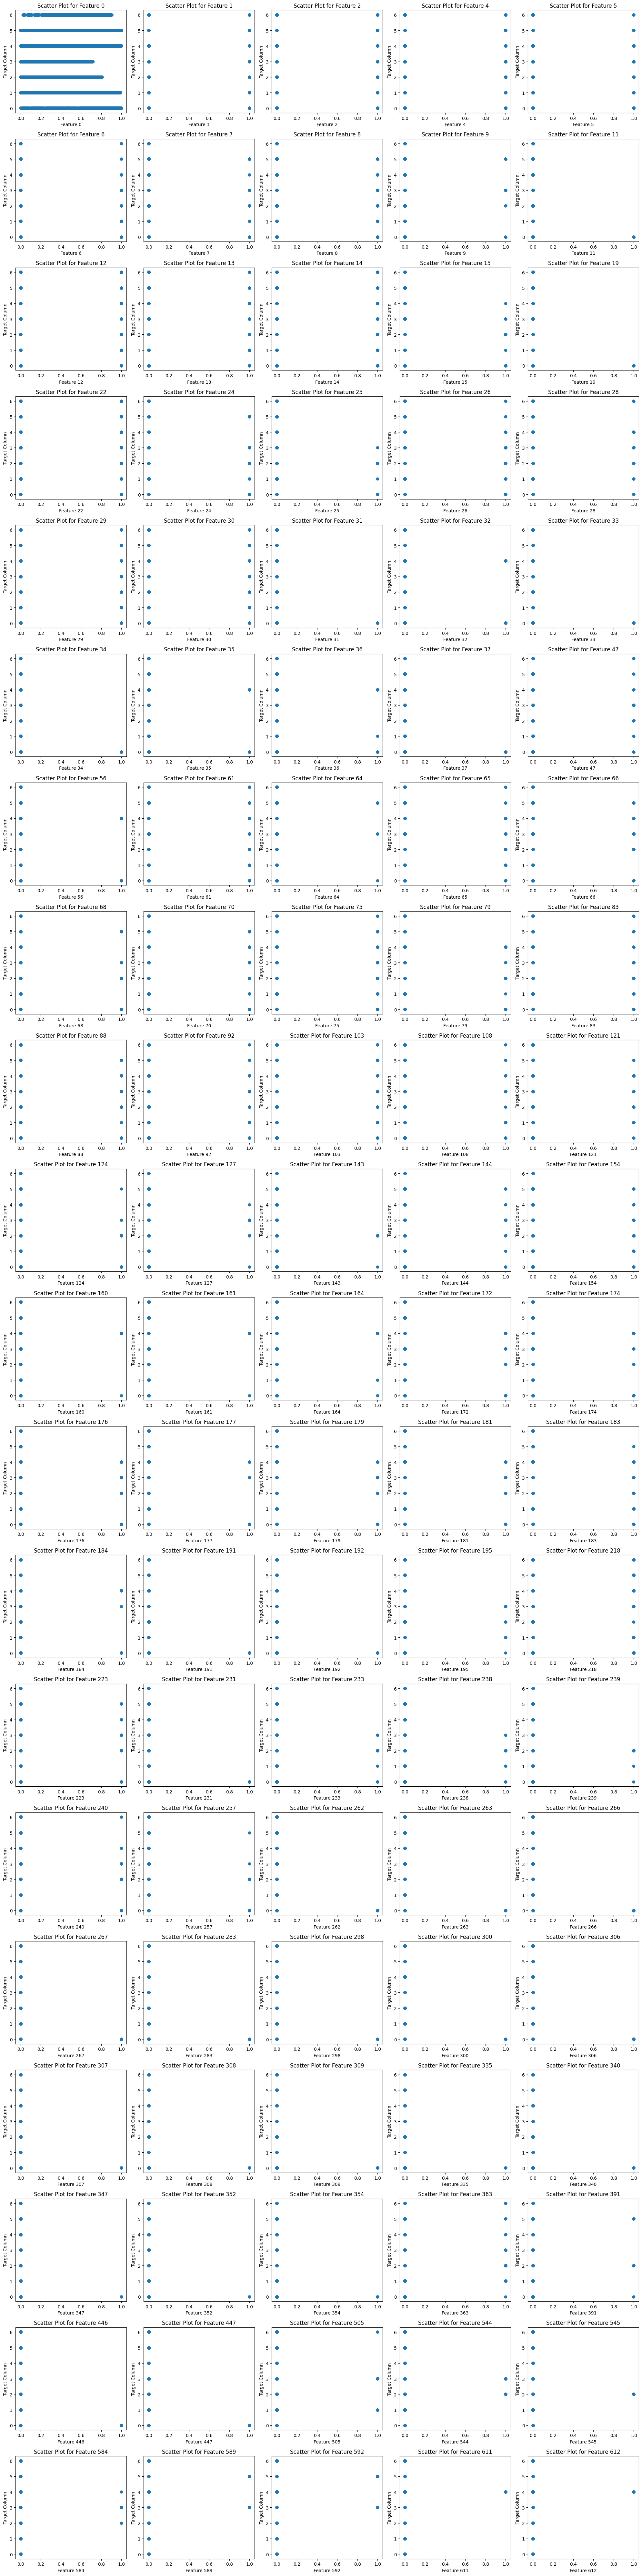

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Assuming X contains all features and y is the target column
# Perform feature selection using RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_DLL, y_DLL)

# Extract feature importances
feature_importances = rf.feature_importances_

# Select top 100 important features
sfm = SelectFromModel(rf, threshold=-np.inf, max_features=100)
X_selected = sfm.fit_transform(X_DLL, y_DLL)

# Get indices of selected features
selected_feature_indices = sfm.get_support(indices=True)

# Create scatter plots for each selected feature against the target column
plt.figure(figsize=(20, 80))
for i, feature_index in enumerate(selected_feature_indices):
    plt.subplot(20, 5, i+1)
    plt.scatter(X_DLL.iloc[:, feature_index], y_DLL)
    plt.xlabel('Feature {}'.format(feature_index))
    plt.ylabel('Target Column')
    plt.title('Scatter Plot for Feature {}'.format(feature_index))
plt.tight_layout()
plt.show()


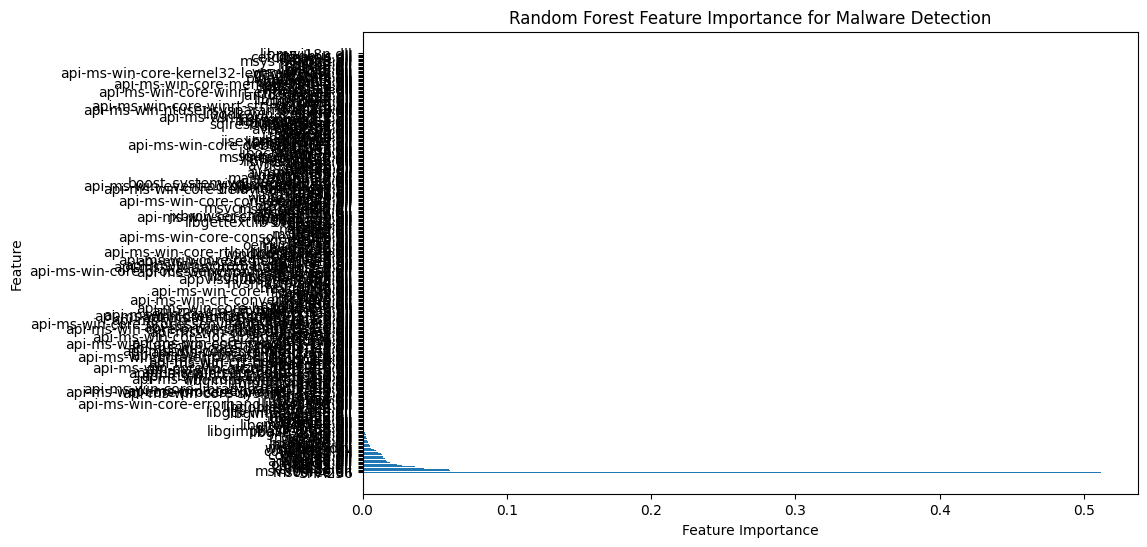

In [25]:

# Load your dataset (assuming 'df' is your DataFrame containing the header data)
# Replace 'target_column' with the name of your target variable column (e.g., 'Type')
X = finalDLL_df1.drop(columns=['Type'])  # Exclude SHA256 and target column
y = finalDLL_df1['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance for Malware Detection')
plt.show()

# Second Dataset PE_Header

In [26]:
df1 = pd.read_csv('PE_Header.csv')
df1.head()

SHA256  Type  e_magic  e_cblp  \
0  dacbe8cb72dd746539792a50e84965fefef73feaa07b5d...     0    23117     144   
1  d3dc7512ce75db33b2c3063fa99245e9ca9fe3b086462f...     0    23117     144   
2  b350fac81533f02981dc2176ed17163177d92d9405758e...     0    23117     144   
3  dfee618043a47b7b09305df0ca460559d9f567ee246c7b...     0    23117     144   
4  c7b2e4e4fb2fcc44c953673ff57c3d14bdf5d2008f35e9...     0    23117     144   

   e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  ...  SizeOfImage  \
0     3       0          4           0       65535     0  ...       139264   
1     3       0          4           0       65535     0  ...        49152   
2     3       0          4           0       65535     0  ...       532480   
3     3       0          4           0       65535     0  ...      1368064   
4     3       0          4           0       65535     0  ...        32768   

   SizeOfHeaders  CheckSum  Subsystem  DllCharacteristics  SizeOfStackReserve  \
0           4096         0          2                1344             1048576   
1            512         0          2               34112             1048576   
2            512         0          2               34144             1048576   
3           4096   1366781          2                1024             1048576   
4            512     64362          2                1344             1048576   

   SizeOfHeapReserve  SizeOfHeapCommit  LoaderFlags  NumberOfRvaAndSizes  
0            1048576              4096            0                   16  
1            1048576              4096            0                   16  
2            1048576              4096            0                   16  
3            1048576              4096            0                   16  
4            1048576              4096            0                   16  

[5 rows x 54 columns]

In [27]:
df1.columns

Index(['SHA256', 'Type', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'Reserved1',
       'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem',
       'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes'],
      dtype='obj

## PE Header feature selection

In [28]:
features_to_keep = ['SHA256', 'Type', 'Machine', 'NumberOfSections','TimeDateStamp','SizeOfOptionalHeader'
,'Characteristics','SizeOfCode','SizeOfInitializedData','AddressOfEntryPoint','CheckSum','Subsystem',
'DllCharacteristics']  


# SHA256: Unique identifier for each file.
# Type: Indicates whether the file is malware or benign.
# Machine: Target CPU architecture for which the executable is intended.
# NumberOfSections: Number of sections in the PE file.
# TimeDateStamp: Date and time when the file was created or modified.
# SizeOfOptionalHeader: Size of the optional header in the PE file.
# Characteristics: Flags indicating various attributes of the file.
# SizeOfCode: Size of the code section in the PE file.
# SizeOfInitializedData: Size of the initialized data section in the PE file.
# AddressOfEntryPoint: Entry point of the program when it is loaded into memory.
# CheckSum: Checksum value for verifying file integrity.
# Subsystem: Subsystem required to run the executable.
# DllCharacteristics: Characteristics specific to DLL files.


df1 = df1.loc[:, features_to_keep]

In [29]:
df1.shape

(29807, 13)

In [30]:
df1.columns

Index(['SHA256', 'Type', 'Machine', 'NumberOfSections', 'TimeDateStamp',
       'SizeOfOptionalHeader', 'Characteristics', 'SizeOfCode',
       'SizeOfInitializedData', 'AddressOfEntryPoint', 'CheckSum', 'Subsystem',
       'DllCharacteristics'],
      dtype='object')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29807 entries, 0 to 29806
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SHA256                 29807 non-null  object
 1   Type                   29807 non-null  int64 
 2   Machine                29807 non-null  int64 
 3   NumberOfSections       29807 non-null  int64 
 4   TimeDateStamp          29807 non-null  int64 
 5   SizeOfOptionalHeader   29807 non-null  int64 
 6   Characteristics        29807 non-null  int64 
 7   SizeOfCode             29807 non-null  int64 
 8   SizeOfInitializedData  29807 non-null  int64 
 9   AddressOfEntryPoint    29807 non-null  int64 
 10  CheckSum               29807 non-null  int64 
 11  Subsystem              29807 non-null  int64 
 12  DllCharacteristics     29807 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.0+ MB


In [32]:
null_counts = df1.isnull().sum()
print(null_counts)

SHA256                   0
Type                     0
Machine                  0
NumberOfSections         0
TimeDateStamp            0
SizeOfOptionalHeader     0
Characteristics          0
SizeOfCode               0
SizeOfInitializedData    0
AddressOfEntryPoint      0
CheckSum                 0
Subsystem                0
DllCharacteristics       0
dtype: int64


In [33]:
duplicates = df1.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
29802    False
29803    False
29804    False
29805    False
29806    False
Length: 29807, dtype: bool


In [34]:
df1.head(5)

SHA256  Type  Machine  \
0  dacbe8cb72dd746539792a50e84965fefef73feaa07b5d...     0      332   
1  d3dc7512ce75db33b2c3063fa99245e9ca9fe3b086462f...     0      332   
2  b350fac81533f02981dc2176ed17163177d92d9405758e...     0      332   
3  dfee618043a47b7b09305df0ca460559d9f567ee246c7b...     0      332   
4  c7b2e4e4fb2fcc44c953673ff57c3d14bdf5d2008f35e9...     0      332   

   NumberOfSections  TimeDateStamp  SizeOfOptionalHeader  Characteristics  \
0                 3     1204845859                   224              270   
1                 3     1386518946                   224              258   
2                 3     1381123677                   224              258   
3                 3     1142537706                   224              270   
4                 3     1194420376                   224              270   

   SizeOfCode  SizeOfInitializedData  AddressOfEntryPoint  CheckSum  \
0      114688                   8192               122766         0   
1       16896                   2048                24622         0   
2      506880                   2048               514606         0   
3     1314816                  32768              1320222   1366781   
4        3072                   1536                10846     64362   

   Subsystem  DllCharacteristics  
0          2                1344  
1          2               34112  
2          2               34144  
3          2                1024  
4          2                1344

In [35]:
encoder = LabelEncoder()
df1['SHA256'] = encoder.fit_transform(df1['SHA256'])
df1.head(5)

SHA256  Type  Machine  NumberOfSections  TimeDateStamp  \
0   27563     0      332                 3     1204845859   
1   27067     0      332                 3     1386518946   
2   24211     0      332                 3     1381123677   
3   27928     0      332                 3     1142537706   
4   26024     0      332                 3     1194420376   

   SizeOfOptionalHeader  Characteristics  SizeOfCode  SizeOfInitializedData  \
0                   224              270      114688                   8192   
1                   224              258       16896                   2048   
2                   224              258      506880                   2048   
3                   224              270     1314816                  32768   
4                   224              270        3072                   1536   

   AddressOfEntryPoint  CheckSum  Subsystem  DllCharacteristics  
0               122766         0          2                1344  
1                24622         0          2               34112  
2               514606         0          2               34144  
3              1320222   1366781          2                1024  
4                10846     64362          2                1344

In [36]:
scaler = MinMaxScaler()
df1['SHA256'] = scaler.fit_transform(df1[['SHA256']])

df1.head(5)

SHA256  Type  Machine  NumberOfSections  TimeDateStamp  \
0  0.924747     0      332                 3     1204845859   
1  0.908106     0      332                 3     1386518946   
2  0.812286     0      332                 3     1381123677   
3  0.936993     0      332                 3     1142537706   
4  0.873113     0      332                 3     1194420376   

   SizeOfOptionalHeader  Characteristics  SizeOfCode  SizeOfInitializedData  \
0                   224              270      114688                   8192   
1                   224              258       16896                   2048   
2                   224              258      506880                   2048   
3                   224              270     1314816                  32768   
4                   224              270        3072                   1536   

   AddressOfEntryPoint  CheckSum  Subsystem  DllCharacteristics  
0               122766         0          2                1344  
1                24622         0          2               34112  
2               514606         0          2               34144  
3              1320222   1366781          2                1024  
4                10846     64362          2                1344

In [37]:
df1.shape

(29807, 13)

In [38]:
df1.columns

Index(['SHA256', 'Type', 'Machine', 'NumberOfSections', 'TimeDateStamp',
       'SizeOfOptionalHeader', 'Characteristics', 'SizeOfCode',
       'SizeOfInitializedData', 'AddressOfEntryPoint', 'CheckSum', 'Subsystem',
       'DllCharacteristics'],
      dtype='object')

## PE Header visualization

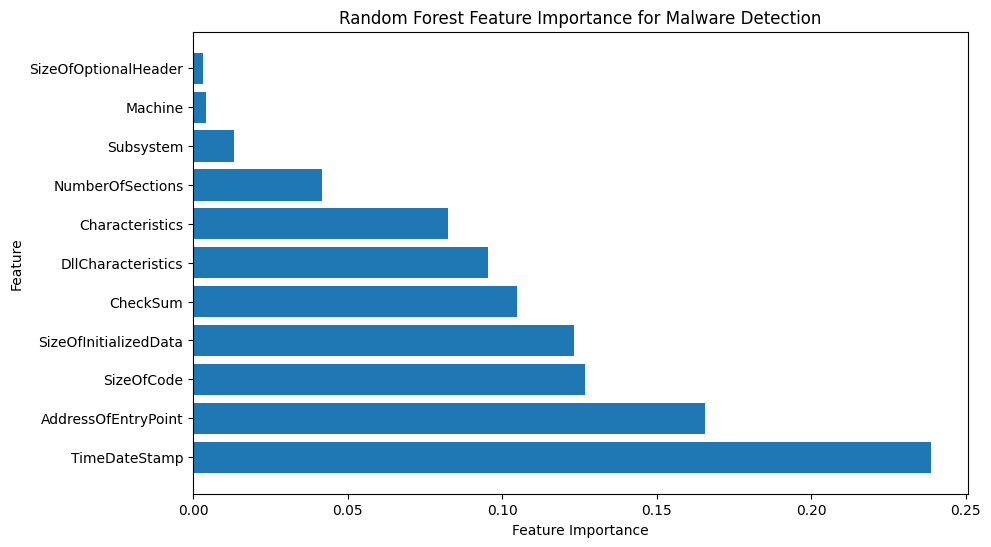

In [39]:


# Load your dataset (assuming 'df' is your DataFrame containing the header data)
# Replace 'target_column' with the name of your target variable column (e.g., 'Type')
X = df1.drop(columns=['SHA256', 'Type'])  # Exclude SHA256 and target column
y = df1['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance for Malware Detection')
plt.show()


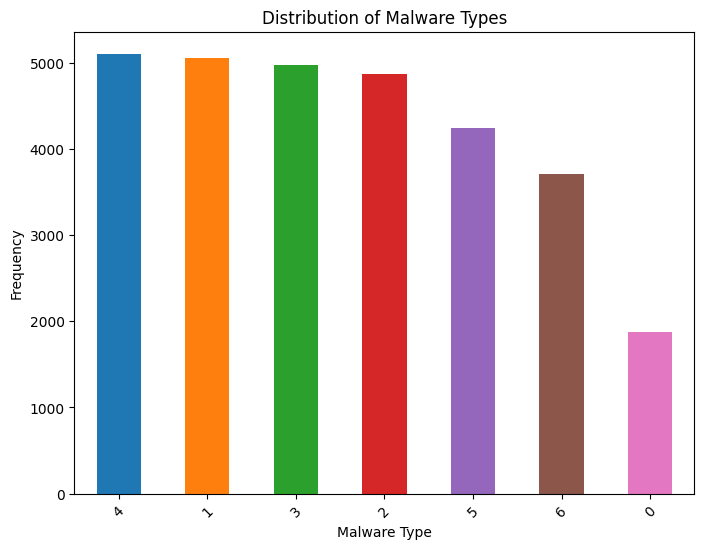

In [40]:
# Plot the distribution of malware types
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(8, 6))
df1['Type'].value_counts().plot(kind='bar', color=custom_colors)
plt.title('Distribution of Malware Types')
plt.xlabel('Malware Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


 

# 0=Benign
# 1=RedLineStealer
# 2= Downloader    
# 3=RAT
# 4=BankingTrojan
# 5=SnakeKeyLogger
# 6=Spyware

# Merging DDL and FE_Header

In [41]:
df2 = pd.merge(finalDLL_df1, df1, on=['SHA256','Type'], how='outer')
#df1 = PE header
#df = DLL
#df2 = merge el final DLL ma3 header

In [42]:
df2.head(5)

SHA256  mscoree.dll  msvbvm60.dll  kernel32.dll  gdi32.dll  user32.dll  \
0  0.000780          0.0           0.0           1.0        0.0         0.0   
1  0.183461          0.0           0.0           1.0        0.0         0.0   
2  0.204720          0.0           0.0           1.0        0.0         1.0   
3  0.212009          0.0           0.0           1.0        0.0         1.0   
4  0.217197          0.0           0.0           1.0        0.0         0.0   

   msvcrt.dll  oleaut32.dll  winmm.dll  mfc42.dll  ...  NumberOfSections  \
0         0.0           1.0        0.0        0.0  ...               NaN   
1         0.0           0.0        0.0        0.0  ...               NaN   
2         1.0           0.0        0.0        0.0  ...               NaN   
3         0.0           1.0        0.0        0.0  ...               NaN   
4         0.0           0.0        0.0        0.0  ...               NaN   

   TimeDateStamp  SizeOfOptionalHeader  Characteristics  SizeOfCode  \
0            NaN                   NaN              NaN         NaN   
1            NaN                   NaN              NaN         NaN   
2            NaN                   NaN              NaN         NaN   
3            NaN                   NaN              NaN         NaN   
4            NaN                   NaN              NaN         NaN   

   SizeOfInitializedData  AddressOfEntryPoint  CheckSum  Subsystem  \
0                    NaN                  NaN       NaN        NaN   
1                    NaN                  NaN       NaN        NaN   
2                    NaN                  NaN       NaN        NaN   
3                    NaN                  NaN       NaN        NaN   
4                    NaN                  NaN       NaN        NaN   

   DllCharacteristics  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 327 columns]

In [43]:
df2.columns

Index(['SHA256', 'mscoree.dll', 'msvbvm60.dll', 'kernel32.dll', 'gdi32.dll',
       'user32.dll', 'msvcrt.dll', 'oleaut32.dll', 'winmm.dll', 'mfc42.dll',
       ...
       'NumberOfSections', 'TimeDateStamp', 'SizeOfOptionalHeader',
       'Characteristics', 'SizeOfCode', 'SizeOfInitializedData',
       'AddressOfEntryPoint', 'CheckSum', 'Subsystem', 'DllCharacteristics'],
      dtype='object', length=327)

In [44]:
df2.shape

(59309, 327)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59309 entries, 0 to 59308
Columns: 327 entries, SHA256 to DllCharacteristics
dtypes: float64(326), int64(1)
memory usage: 148.4 MB


In [46]:
null_counts = df2.isnull().sum()
print(null_counts)

SHA256                       0
mscoree.dll              29805
msvbvm60.dll             29805
kernel32.dll             29805
gdi32.dll                29805
                         ...  
SizeOfInitializedData    29502
AddressOfEntryPoint      29502
CheckSum                 29502
Subsystem                29502
DllCharacteristics       29502
Length: 327, dtype: int64


In [47]:
object_columns = df2.select_dtypes(include=['object']).columns

# Print the names of columns that are of object type
print(object_columns)

Index([], dtype='object')


In [48]:
exclude_columns = ['SHA256', 'Type']

for column in df2.columns:
    if column not in exclude_columns:
        df2[column].fillna(df2[column].median(), inplace=True)

# Display the modified DataFrame
df2.head()

SHA256  mscoree.dll  msvbvm60.dll  kernel32.dll  gdi32.dll  user32.dll  \
0  0.000780          0.0           0.0           1.0        0.0         0.0   
1  0.183461          0.0           0.0           1.0        0.0         0.0   
2  0.204720          0.0           0.0           1.0        0.0         1.0   
3  0.212009          0.0           0.0           1.0        0.0         1.0   
4  0.217197          0.0           0.0           1.0        0.0         0.0   

   msvcrt.dll  oleaut32.dll  winmm.dll  mfc42.dll  ...  NumberOfSections  \
0         0.0           1.0        0.0        0.0  ...               3.0   
1         0.0           0.0        0.0        0.0  ...               3.0   
2         1.0           0.0        0.0        0.0  ...               3.0   
3         0.0           1.0        0.0        0.0  ...               3.0   
4         0.0           0.0        0.0        0.0  ...               3.0   

   TimeDateStamp  SizeOfOptionalHeader  Characteristics  SizeOfCode  \
0   1.608884e+09                 224.0            259.0    201728.0   
1   1.608884e+09                 224.0            259.0    201728.0   
2   1.608884e+09                 224.0            259.0    201728.0   
3   1.608884e+09                 224.0            259.0    201728.0   
4   1.608884e+09                 224.0            259.0    201728.0   

   SizeOfInitializedData  AddressOfEntryPoint  CheckSum  Subsystem  \
0                59904.0              55488.0       0.0        2.0   
1                59904.0              55488.0       0.0        2.0   
2                59904.0              55488.0       0.0        2.0   
3                59904.0              55488.0       0.0        2.0   
4                59904.0              55488.0       0.0        2.0   

   DllCharacteristics  
0             33024.0  
1             33024.0  
2             33024.0  
3             33024.0  
4             33024.0  

[5 rows x 327 columns]

In [49]:
null_counts = df2.isnull().sum()
print(null_counts)

SHA256                   0
mscoree.dll              0
msvbvm60.dll             0
kernel32.dll             0
gdi32.dll                0
                        ..
SizeOfInitializedData    0
AddressOfEntryPoint      0
CheckSum                 0
Subsystem                0
DllCharacteristics       0
Length: 327, dtype: int64


In [50]:
df2.shape

(59309, 327)

In [51]:
duplicates = df2.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
59304    False
59305    False
59306    False
59307    False
59308    False
Length: 59309, dtype: bool


In [52]:
df2['Type'].unique()

array([0, 1, 2, 3, 4, 5, 6])

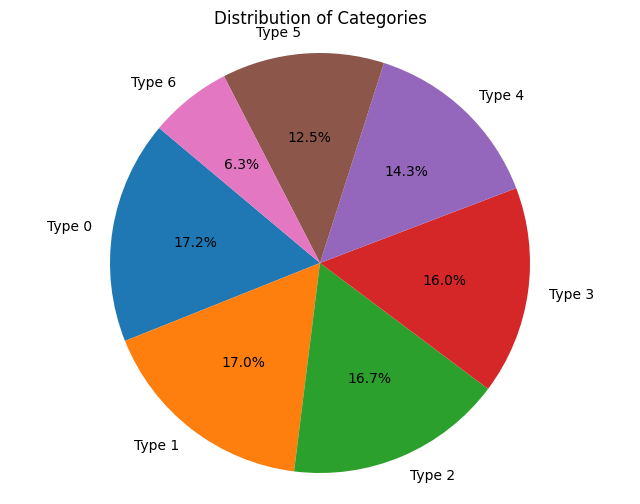

In [53]:
import matplotlib.pyplot as plt

# Data
labels = ['Type 0','Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5','Type 6']
# sizes = [25, 30, 20, 25]  # Sizes or proportions for each category
class_counts = df2['Type'].value_counts()
# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Categories')
plt.show()

# Feature Selection

We tried to get the importance features greater than 0

In [54]:
# df2 = Pe header
X = df2.drop(['Type'], axis=1)
y = df2['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [55]:


# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)


                                            importance
SHA256                                        0.297779
TimeDateStamp                                 0.093439
AddressOfEntryPoint                           0.072122
SizeOfCode                                    0.066330
SizeOfInitializedData                         0.062745
...                                                ...
cefcommon.dll                                 0.000003
libmwi18n.dll                                 0.000003
sqlite.dll                                    0.000003
api-ms-win-core-kernel32-legacy-l1-1-1.dll    0.000003
api-ms-win-core-io-l1-1-1.dll                 0.000002

[326 rows x 1 columns]


In [56]:
# Option 1: By a fixed threshold
threshold = 0 # Example threshold
selected_features = feature_importances[feature_importances['importance'] > threshold].index.tolist()



In [57]:
# Assuming 'X' is your original dataset and 'selected_features' contains the list of feature names to keep

# Create a new DataFrame with only the selected features
df3 = df2[selected_features]

# Now 'new_dataframe' contains only the columns for 'selected_features' with the same number of rows as 'X'
df3.head()


SHA256  TimeDateStamp  AddressOfEntryPoint  SizeOfCode  \
0  0.000780   1.608884e+09              55488.0    201728.0   
1  0.183461   1.608884e+09              55488.0    201728.0   
2  0.204720   1.608884e+09              55488.0    201728.0   
3  0.212009   1.608884e+09              55488.0    201728.0   
4  0.217197   1.608884e+09              55488.0    201728.0   

   SizeOfInitializedData  CheckSum  DllCharacteristics  Characteristics  \
0                59904.0       0.0             33024.0            259.0   
1                59904.0       0.0             33024.0            259.0   
2                59904.0       0.0             33024.0            259.0   
3                59904.0       0.0             33024.0            259.0   
4                59904.0       0.0             33024.0            259.0   

   msvbvm60.dll  mscoree.dll  ...  wldap32.dll  ntdsapi.dll  d3d11.dll  \
0           0.0          0.0  ...          0.0          0.0        0.0   
1           0.0          0.0  ...          0.0          0.0        0.0   
2           0.0          0.0  ...          0.0          0.0        0.0   
3           0.0          0.0  ...          0.0          0.0        0.0   
4           0.0          0.0  ...          0.0          0.0        0.0   

   query.dll  ddraw.dll  cefcommon.dll  libmwi18n.dll  sqlite.dll  \
0        0.0        0.0            0.0            0.0         0.0   
1        0.0        0.0            0.0            0.0         0.0   
2        0.0        0.0            0.0            0.0         0.0   
3        0.0        0.0            0.0            0.0         0.0   
4        0.0        0.0            0.0            0.0         0.0   

   api-ms-win-core-kernel32-legacy-l1-1-1.dll  api-ms-win-core-io-l1-1-1.dll  
0                                         0.0                            0.0  
1                                         0.0                            0.0  
2                                         0.0                            0.0  
3                                         0.0                            0.0  
4                                         0.0                            0.0  

[5 rows x 326 columns]

In [58]:
df3.shape

(59309, 326)

We tried to get the average of the importance features

In [59]:
# Calculate the average of the feature importances
average_importance = feature_importances['importance'].mean()
print(f"Average of feature importance scores: {average_importance}")


Average of feature importance scores: 0.0030674846625766868


In [60]:
# Option 1: By a fixed threshold
average_threshold= 0.0030674846625766868 # Example threshold
average_selected_features = feature_importances[feature_importances['importance'] > average_threshold].index.tolist()



In [61]:
# Assuming 'X' is your original dataset and 'selected_features' contains the list of feature names to keep

# Create a new DataFrame with only the selected features
averaged_df = df2[average_selected_features]

# Now 'new_dataframe' contains only the columns for 'selected_features' with the same number of rows as 'X'
averaged_df.head()


SHA256  TimeDateStamp  AddressOfEntryPoint  SizeOfCode  \
0  0.000780   1.608884e+09              55488.0    201728.0   
1  0.183461   1.608884e+09              55488.0    201728.0   
2  0.204720   1.608884e+09              55488.0    201728.0   
3  0.212009   1.608884e+09              55488.0    201728.0   
4  0.217197   1.608884e+09              55488.0    201728.0   

   SizeOfInitializedData  CheckSum  DllCharacteristics  Characteristics  \
0                59904.0       0.0             33024.0            259.0   
1                59904.0       0.0             33024.0            259.0   
2                59904.0       0.0             33024.0            259.0   
3                59904.0       0.0             33024.0            259.0   
4                59904.0       0.0             33024.0            259.0   

   msvbvm60.dll  mscoree.dll  ...  msvcrt.dll  ole32.dll  shlwapi.dll  \
0           0.0          0.0  ...         0.0        1.0          1.0   
1           0.0          0.0  ...         0.0        0.0          0.0   
2           0.0          0.0  ...         1.0        1.0          0.0   
3           0.0          0.0  ...         0.0        1.0          1.0   
4           0.0          0.0  ...         0.0        0.0          0.0   

   version.dll  comctl32.dll  winhttp.dll  shell32.dll  comdlg32.dll  \
0          0.0           0.0          0.0          0.0           0.0   
1          0.0           0.0          0.0          0.0           0.0   
2          0.0           0.0          0.0          1.0           0.0   
3          1.0           0.0          0.0          0.0           0.0   
4          0.0           0.0          0.0          0.0           0.0   

   SizeOfOptionalHeader  Machine  
0                 224.0    332.0  
1                 224.0    332.0  
2                 224.0    332.0  
3                 224.0    332.0  
4                 224.0    332.0  

[5 rows x 29 columns]

In [62]:
averaged_df.shape

(59309, 29)

We tried to get the median of the importance features, we will work on this method 

In [63]:
median_importance = feature_importances['importance'].median()
print(f"Median of feature importance scores: {median_importance}")

Median of feature importance scores: 2.9303540957329814e-05


In [64]:
# Option 1: By a fixed threshold
median_threshold = 2.9303540957329814e-05 # Example threshold
median_selected_features= feature_importances[feature_importances['importance'] > median_threshold].index.tolist()



In [65]:
# Assuming 'X' is your original dataset and 'selected_features' contains the list of feature names to keep

# Create a new DataFrame with only the selected features
medianFinal_df = df2[median_selected_features]

# Now 'new_dataframe' contains only the columns for 'selected_features' with the same number of rows as 'X'
medianFinal_df.head()


SHA256  TimeDateStamp  AddressOfEntryPoint  SizeOfCode  \
0  0.000780   1.608884e+09              55488.0    201728.0   
1  0.183461   1.608884e+09              55488.0    201728.0   
2  0.204720   1.608884e+09              55488.0    201728.0   
3  0.212009   1.608884e+09              55488.0    201728.0   
4  0.217197   1.608884e+09              55488.0    201728.0   

   SizeOfInitializedData  CheckSum  DllCharacteristics  Characteristics  \
0                59904.0       0.0             33024.0            259.0   
1                59904.0       0.0             33024.0            259.0   
2                59904.0       0.0             33024.0            259.0   
3                59904.0       0.0             33024.0            259.0   
4                59904.0       0.0             33024.0            259.0   

   msvbvm60.dll  mscoree.dll  ...  msi.dll  engine.dll  tapi32.dll  \
0           0.0          0.0  ...      0.0         0.0         0.0   
1           0.0          0.0  ...      0.0         0.0         0.0   
2           0.0          0.0  ...      0.0         0.0         0.0   
3           0.0          0.0  ...      0.0         0.0         0.0   
4           0.0          0.0  ...      0.0         0.0         0.0   

   activeds.dll  libz.dll  nvsmartmax64.dll  cmutil.dll  \
0           0.0       0.0               0.0         0.0   
1           0.0       0.0               0.0         0.0   
2           0.0       0.0               0.0         0.0   
3           0.0       0.0               0.0         0.0   
4           0.0       0.0               0.0         0.0   

   api-ms-win-core-rtlsupport-l1-2-0.dll  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   api-ms-win-core-processenvironment-l1-1-0.dll  propsys.dll  
0                                            0.0          0.0  
1                                            0.0          0.0  
2                                            0.0          0.0  
3                                            0.0          0.0  
4                                            0.0          0.0  

[5 rows x 163 columns]

In [66]:
medianFinal_df.shape

(59309, 163)

In [67]:
#merging the target with the selected featuers
final_df = pd.merge(medianFinal_df, df2[['SHA256', 'Type']], on='SHA256', how='left')
final_df.shape

(59347, 164)

In [68]:
final_df.columns

Index(['SHA256', 'TimeDateStamp', 'AddressOfEntryPoint', 'SizeOfCode',
       'SizeOfInitializedData', 'CheckSum', 'DllCharacteristics',
       'Characteristics', 'msvbvm60.dll', 'mscoree.dll',
       ...
       'engine.dll', 'tapi32.dll', 'activeds.dll', 'libz.dll',
       'nvsmartmax64.dll', 'cmutil.dll',
       'api-ms-win-core-rtlsupport-l1-2-0.dll',
       'api-ms-win-core-processenvironment-l1-1-0.dll', 'propsys.dll', 'Type'],
      dtype='object', length=164)

# Visualization Merged Data


Before feature selection

In [69]:

# # Plot histograms for numeric columns
# df3.hist(figsize=(10, 8))
# plt.show()

In [70]:
# import seaborn as sns

# # Compute correlation matrix
# correlation_matrix = df3.corr()

# # Plot heatmap of correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()

As we see the previous results was terrible , so we will se now after feature selection

In [71]:
#merging the target with the selected featuers
# final_df = pd.merge(median_df, df3[['SHA256', 'Type']], on='SHA256', how='left')


In [72]:
# final_df.head(5)

In [73]:
# final_df.columns

In [74]:
# final_df.hist(figsize=(10,8))
# plt.show()

In [75]:
# Choose a numeric feature (replace 'feature_name' with the actual column name)
feature_name = 'SHA256'

# # Plot scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(final_df[feature_name], final_df['Type'], alpha=0.5)
# plt.title('Scatter Plot of {} vs. Target Variable'.format(feature_name))
# plt.xlabel('{}'.format(feature_name))
# plt.ylabel('Target Variable')
# plt.grid(True)
plt.show()

In [76]:


# # Assuming df is your DataFrame containing numeric features and target variable
# # Compute correlation matrix
# correlation_matrix = final_df.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
# plt.title('Heatmap of Correlation Matrix')
# plt.show()

In [77]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(final_df, annot=True, fmt=".2f")
# plt.title('Heatmap of Correlation Matrix')
# plt.show()

In [80]:
# plt.figure(figsize = [16 ,8])
# sns.countplot(data = final_df, x = 'Neighbourhood', color = sns.color_palette()[3])
# #graph polishing
# plt.xticks(rotation=90);
# plt.title("Distribution of Neighbourhood");
# plt.ylabel("NUM");

In [81]:
# #I'm trying to visualise the mean of features with the target 

# # Assuming df is your DataFrame containing the 144 features
# # Calculate the mean values of the features
# feature_means = final_df.mean()

# # Plot bar plot of feature means
# plt.figure(figsize=(12, 6))
# feature_means.plot(kind='bar')
# plt.title('Mean Values of 144 Features')
# plt.xlabel('Feature')
# plt.ylabel('Mean Value')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()

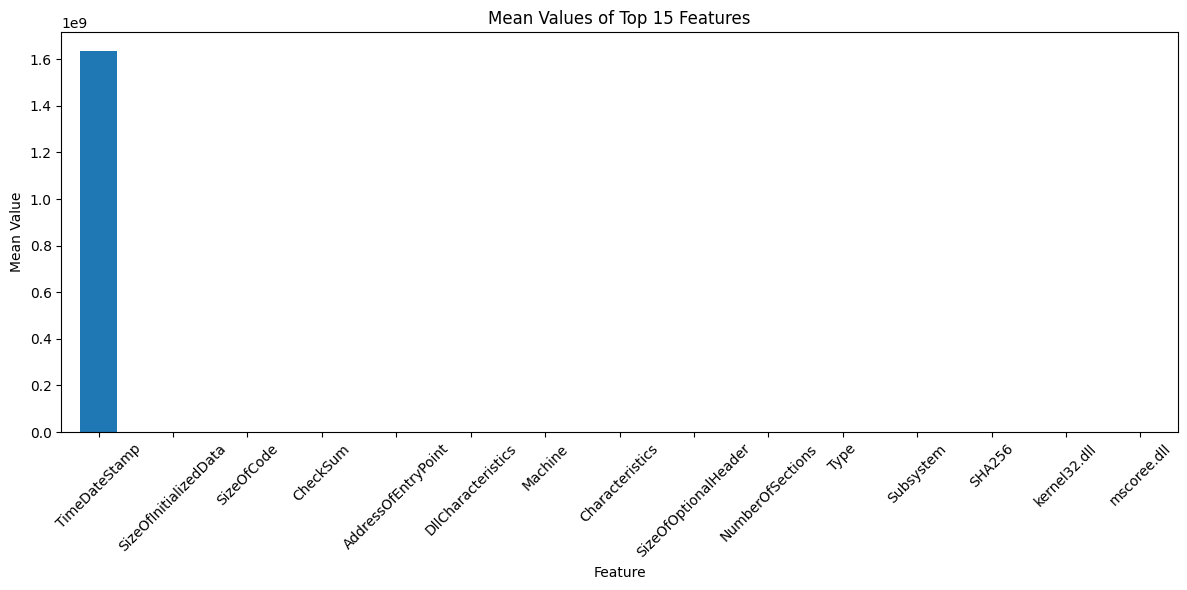

In [82]:

# Assuming df is your DataFrame containing the 144 features
# Calculate the mean values of the features
feature_means = final_df.mean()

# Sort the mean values in descending order and select the top 15 features
top_15_features = feature_means.sort_values(ascending=False).head(15)

# Plot bar plot of top 15 features' means
plt.figure(figsize=(12, 6))
top_15_features.plot(kind='bar')
plt.title('Mean Values of Top 15 Features')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


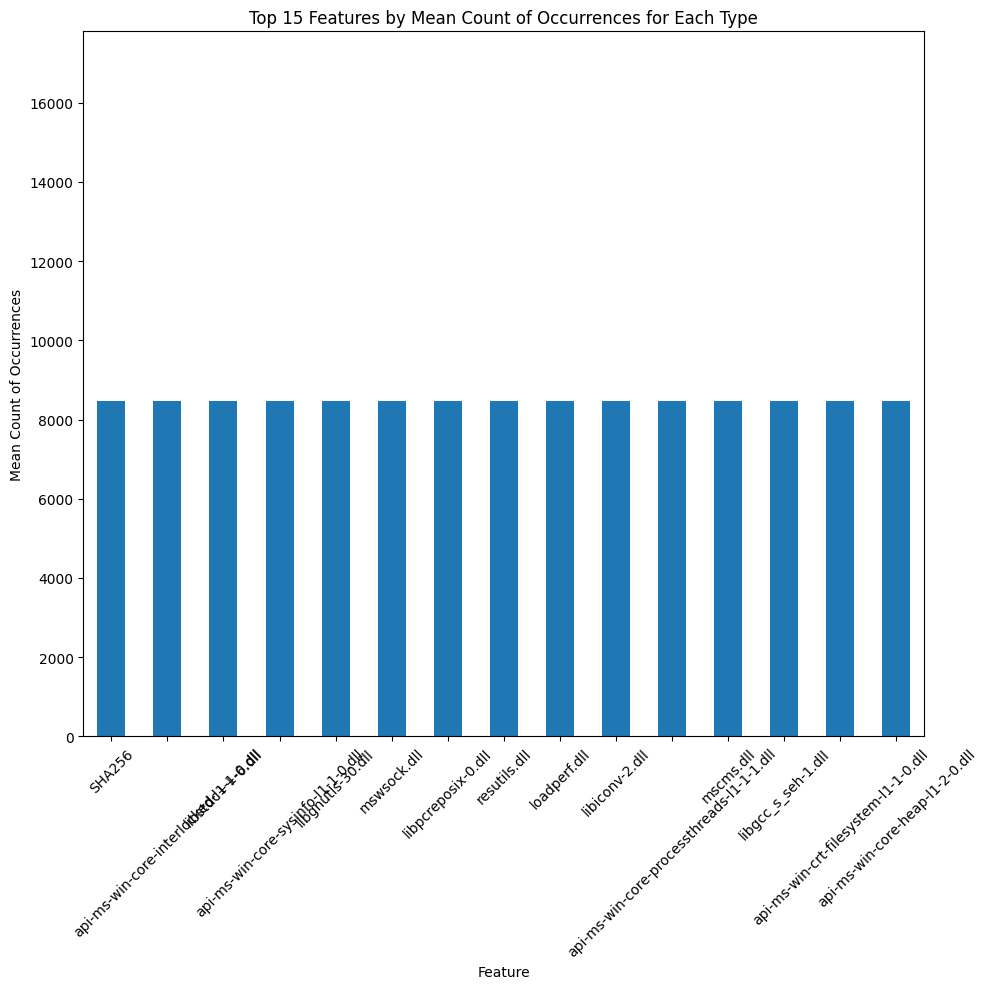

In [83]:
feature_counts_by_type = final_df.groupby('Type').count()

# Select the top 15 features
top_15_features = feature_counts_by_type.mean().sort_values(ascending=False).head(15)

# Plot bar plot of top 15 features
plt.figure(figsize=(10, 10))
top_15_features.plot(kind='bar')
plt.title('Top 15 Features by Mean Count of Occurrences for Each Type')
plt.xlabel('Feature')
plt.ylabel('Mean Count of Occurrences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, top_15_features.max() * 2.1)  # Adjust the multiplier (1.1) as needed for desired padding

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Modeling

In [84]:

X_final = final_df.drop(['Type'], axis=1)
y_final = final_df['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final,test_size=0.2, random_state=42)

# XBGOOST

In [86]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [89]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

# Initialize the XGBoost Classifier
xg_clf = XGBClassifier(objective ='multi:softmax', learning_rate = 1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the classifier to the training set
xg_clf.fit(X_train, y_train)

# Predicting on the test set
predictions_xg = xg_clf.predict(X_test)

# Evaluate the performance
rmse_xg = mean_squared_error(y_test, predictions_xg, squared=False)
r2_xg = r2_score(y_test, predictions_xg)
print(f"RMSE: {rmse_xg}")
print(f"R-squared: {r2_xg}")
print("Classification Report:")
print(classification_report(y_test, predictions_xg))

RMSE: 1.2913098174529531
R-squared: 0.48785238239067696
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74       760
           1       0.88      0.82      0.85      1985
           2       0.97      0.93      0.95      1967
           3       0.74      0.74      0.74      2003
           4       0.76      0.78      0.77      1978
           5       0.71      0.49      0.58      1691
           6       0.51      0.81      0.63      1486

    accuracy                           0.76     11870
   macro avg       0.78      0.74      0.75     11870
weighted avg       0.78      0.76      0.76     11870



In [90]:
predictions_xg_train = xg_clf.predict(X_train)

# Evaluate the performance
rmse_train = mean_squared_error(y_train, predictions_xg_train, squared=False)
r2_train = r2_score(y_train, predictions_xg_train)
print(f"RMSE: {rmse_train}")
print(f"R-squared: {r2_train}")

RMSE: 1.2413273078711151
R-squared: 0.5266357321183226


# RandomForest

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"R-squared: {r2_rf}")

print("Classification Report:")
print(classification_report(y_test, predictions_rf))


Accuracy: 0.7054759898904802
R-squared: 0.405025902121519
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.47      0.63       760
           1       0.87      0.75      0.81      1985
           2       0.92      0.91      0.92      1967
           3       0.85      0.59      0.70      2003
           4       0.66      0.78      0.71      1978
           5       0.50      0.59      0.54      1691
           6       0.47      0.68      0.56      1486

    accuracy                           0.71     11870
   macro avg       0.75      0.68      0.70     11870
weighted avg       0.75      0.71      0.71     11870



In [92]:
predictions_rf_train = rf_classifier.predict(X_train)

# Evaluate the performance
rmse_train = mean_squared_error(y_train, predictions_rf_train, squared=False)
r2_train = r2_score(y_train, predictions_rf_train)
print(f"RMSE: {rmse_train}")
print(f"R-squared: {r2_train}")

RMSE: 1.371240290651214
R-squared: 0.42236967674911186


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=454cf13d-890e-49ad-a5ff-fa0b8c0e41c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>